# ДЗ № 4

Алиса Лёзина, Дарья Харламова, Андрей Якубой

## Вариант 1

### Шаг 1 (max 1 балл). (Андрей)
Возьмите свой датасет из дз 1 (тот набор узлов и ребёр, из которых состоял ваш первый граф) и превратите его в «типологическую» матрицу, в строках которой будут синсеты, в столбцах - слова, а на их пересечении - 0, если слово не относится к данному синсету, и 1, если относится.

### Шаг 2 (max 1 балл). (Алиса)
Сократите размерность этой матрицы до 2 методом MDS, визуализируйте результат.

### Шаг 3 (max 2 балла). (Даша)
Проанализируйте то, что у вас получилось. Видны ли какие-то закономерности? Стали ли заметны какие-то новые закономерности, которые не были видны раньше, когда вы строили граф? Какие синсеты оказались ближе друг к другу, а какие дальше друг от друга? Кажется ли вам этот результат осмысленным?

### Шаг 4 (max 2 балла). (Андрей и Даша)
Поставьте каждому синсету в соответствие одно русское слово (вручную), возьмите любую модель с http://vectors.nlpl.eu/, вытащите оттуда вектора соответствующих слов, соберите их в одну матрицу и проделайте с ней то же, что и с «типологической» матрицей: сократите размерность до 2 методом MDS и визуализируйте результат.

### Шаг 5 (max 1 балл). (Даша)
Сравните две картинки: соответствует ли взаимное расположение синсетов на «типологической» карте взаимному расположению относящихся к ним русских слов в дистрибутивной модели? О чем это говорит?

### Шаг 6 (max 1 балл). (Алиса, Андрей и Даша)
Посчитайте попарные косинусные расстояния между всеми строками в каждой из матриц, а потом вычислите коэффициент корреляции Пирсона между этими двумя наборами данных. О чем говорит такое значение коэффициента?

### Шаг 7 (бонусный, max 2 балла). (Даша, Алиса и Андрей)
Можно скачать программу Concept Explorer отсюда или любую другую из существующих имплементаций отсюда, загрузить туда «типологическую» матрицу (пример входного формата данных для этой программы можно посмотреть здесь; обратите внимание, разные реализации FCA могут требовать разных форматов входных данных) и построить по этим данным решетку формальных понятий. Проанализируйте эту решетку: есть ли от нее какой-то толк? Позволяет ли она увидеть какие-то новые закономерности в данных?

## Шаг 1

### Восстанавливаем датасет из ДЗ 1

In [ ]:
import nltk
import pandas as pd

nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
# Костыль, чтобы появились другие языки

wn.synsets(b'\xe7\x8a\xac'.decode('utf-8'), lang='jpn')

[Synset('dog.n.01'), Synset('spy.n.01')]

In [ ]:
# Получаем все леммы для всех языков одного синсета

synset = wn.synset("study.v.01")
lemmas = {lang: synset.lemma_names(lang) for lang in wn.langs()}
lemmas

/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=1498548.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=1505508.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=2002046.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=2917945.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")


{'eng': ['analyze', 'analyse', 'study', 'examine', 'canvass', 'canvas'],
 'als': ['analizoj', 'diskutoj', 'ekzaminoj', 'studioj'],
 'arb': ['اختبر',
  'اختصر',
  'استجوب',
  'استنطق',
  'التمس',
  'امتحن',
  'بحث',
  'تأمل',
  'تدارس',
  'جرى_دراسات',
  'حاول',
  'حلل',
  'حلل_نفسيا',
  'حلّل',
  'درس',
  'راجع_دروسه',
  'طاف_لتصيد_أصوات_الناخبين',
  'عاين',
  'فتش',
  'فحص',
  'فحص_بدقة',
  'ناقش'],
 'bul': [],
 'cmn': ['研究'],
 'dan': [],
 'ell': ['αναλύω'],
 'fin': ['analysoida', 'tutkia'],
 'fra': ['analyser', 'examiner', 'étudier'],
 'heb': [],
 'hrv': ['analizirati',
  'ispitati',
  'ispitivati',
  'preispitati',
  'preispitivati',
  'pretresati',
  'pretresti',
  'proučavati',
  'proučiti',
  'razlagati',
  'razložiti',
  'raščlaniti',
  'raščlanjivati'],
 'isl': [],
 'ita': ['analizzare', 'esaminare', 'studiare'],
 'ita_iwn': [],
 'jpn': ['分析+する',
  '吟味+する',
  '攻究+する',
  '査問+する',
  '査閲+する',
  '検する',
  '検分+する',
  '検査+する',
  '検案+する',
  '検討+する',
  '点検+する',
  '研修+する',
  '研学+する',
  '

In [ ]:
# Получаем все синсеты для каждой леммы каждого языка и фильтруем

from collections import Counter


synsets_counter = Counter(syn for lang, lemmas_list in lemmas.items() for lemma in lemmas_list for syn in wn.synsets(lemma, lang=lang))
filtered_synsets = [syn for syn, count in synsets_counter.items() if count > 4]

In [ ]:
filtered_synsets

[Synset('analyze.v.01'),
 Synset('analyze.v.02'),
 Synset('analyze.v.03'),
 Synset('analyze.v.04'),
 Synset('study.v.02'),
 Synset('study.v.03'),
 Synset('learn.v.04'),
 Synset('study.v.05'),
 Synset('study.v.06'),
 Synset('examine.v.02'),
 Synset('probe.v.01'),
 Synset('examine.v.04'),
 Synset('test.v.01'),
 Synset('poll.v.01'),
 Synset('size_up.v.01'),
 Synset('hash_out.v.01'),
 Synset('try_on.v.01'),
 Synset('sample.v.01'),
 Synset('try.v.01'),
 Synset('investigate.v.02'),
 Synset('investigate.v.01'),
 Synset('learn.v.02'),
 Synset('interpret.v.01'),
 Synset('see.v.05'),
 Synset('search.v.01'),
 Synset('search.v.04'),
 Synset('view.v.02'),
 Synset('learn.v.01'),
 Synset('memorize.v.01'),
 Synset('teach.v.01'),
 Synset('inspect.v.01'),
 Synset('check.v.01'),
 Synset('determine.v.08'),
 Synset('control.v.02'),
 Synset('survey.v.01'),
 Synset('research.v.02'),
 Synset('audit.v.01'),
 Synset('screen.v.02'),
 Synset('quiz.v.01'),
 Synset('research.v.01'),
 Synset('survey.v.02'),
 Synset(

### Строим типологическую матрицу

In [ ]:
matrix = {}
for syn in filtered_synsets:
    matrix[syn.name()] = {}
    for lang, lemmas_list in lemmas.items():
        for lemma in lemmas_list:
            matrix[syn.name()][lemma] = 1 if lemma in syn.lemma_names(lang) else 0

In [ ]:
matrix = pd.DataFrame.from_dict(matrix, orient="index")
matrix.fillna(0, inplace=True)
matrix = matrix.astype(int)
matrix.shape

(50, 129)

In [ ]:
matrix.head()

,analyze,analyse,study,examine,canvass,canvas,analizoj,diskutoj,ekzaminoj,studioj,...,rozobrať,skúmať,urobiť_prieskum,študovať,pregledati,preiskati,preiskovati,preveriti,razčlenjevati,วิเคราะห์
analyze.v.01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
analyze.v.02,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
analyze.v.03,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
analyze.v.04,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
study.v.02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Шаг 2 - MDS

In [ ]:
!pip install adjustText

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from adjustText import adjust_text

In [ ]:
array = matrix.values
mds = manifold.MDS(n_components=2)
array_mds = mds.fit_transform(array)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


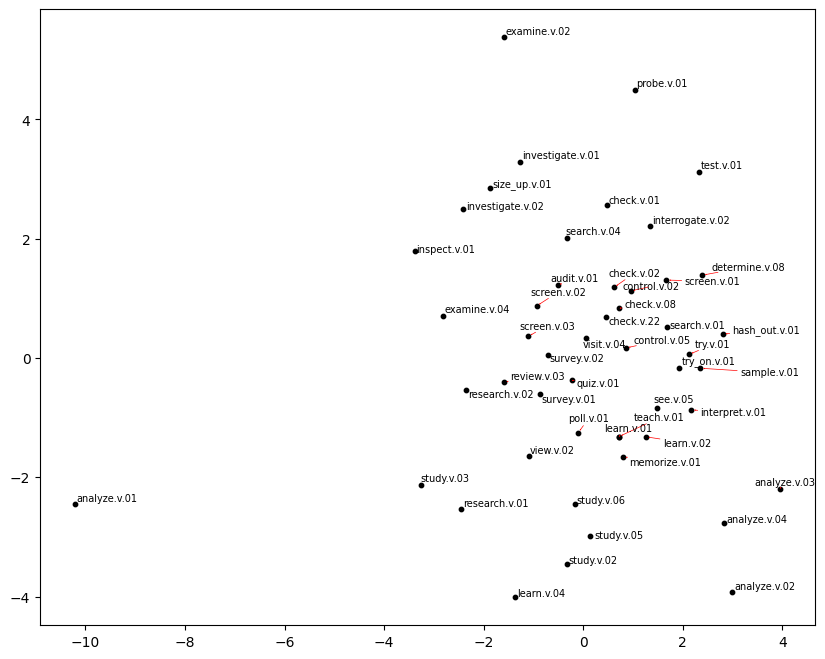

In [ ]:
np.random.seed(19680801)

texts = []
plt.figure(figsize=(10,8))
plt.scatter(array_mds[:, 0], array_mds[:, 1], c='black', s=10)
for el, (x, y) in enumerate(zip(array_mds[:,0], array_mds[:,1])):
    texts.append(plt.text(x, y, matrix.index[el], fontsize=7))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.show()

## Шаг 3

Результаты получились очень интересными. Начнем с того, что для разных визуализаций мы описываем достаточно разные истории. В рамках первого домашнего задания мы анализировали и визуализировали связи между синсетами на основании того, сколько у них общих лемм: это давало нам возможность построить граф с ребрами. В рамках этого же задания мы строим не столько граф, сколько кластеризацию: здесь каждая вершина располагается относительно остальных в зависимости от схожести их "векторных" представлений: для каждого синсета вектор определен тем, входят ли в него рассмотренные нами слова. Технология, которую мы применяем, разумеется, схожа с типологией выстраивания нормальной типологической карты по Хаспельмату, с той только разницей, что вместо языков у нас разные слова в столбцах. Таким образом, если в ДЗ1 мы смотрели на веса связей между разными синсетами, то здесь нас интересуют метрики типа расстояния Хэмминга: насколько вектор слова А похож на вектор слова Б? Еще одно значимое техническое отличие между визуализациями заключается в том, что для графа из ДЗ1 у нас была сохранена вся информация: все, что мы обсчитали для графа, мы смогли представить на визуализации (или смогли бы, если бы захотели). Для текущей же визуализации характерна существенная потеря информации. На самом деле мы работаем в огромном количестве измерений: полная информация о положении точки, соответствующей синсету, закодирована в 128 измерениях. Пусть методы типа MDE помогают сократить искажение расстояний, определенная потеря информации все равно имеет место быть.

Говоря про визуальную составляющую двух визуализаций, можно заметить, что для графа из ДЗ1 нас не очень-то интересовало относительное расположение вершин: мы могли настроить в визуализации притяжение, которое расположило бы ближе те вершины, сила связи между которыми больше, но это был всего один из доступных нам параметров. Тут же мы можем четко и однозначно увидеть "кластеры", которые формируются нашими датапойнтами. Это же на самом деле делает текущую визуализацию гораздо более понятной и человекочитаемой, чем визуализация из ДЗ1. Там ребер было столько, что они затуманивали наше восприятие и заставляли полагаться при анализе в основном на метрики. Здесь же мы можем делать выводы на основании человеческого взгляда, что существенно ускоряет и до некоторой степени облегчает интерпретацию.

Соответственно, еще одним новым доступным нам измерением становятся сами оси X и Y. Как было отмечено выше, мы сжали вектор из 128 измерений всего до двух значений, что сделало оси неинтерпретируемыми. Тем не менее, проанализировав расположение точек на графике, мы можем примерно догадаться, какие именно параметры лежат в основе наших двух измерений визуализации. Например, кажется, что здесь ось Y отвечает за более научное-менее научное: например, можем посмотреть на значения ряда слов, которые расположились по вертикали. То есть, начинаем мы с "научного описания", а заканчиваем "внимательным осмотром":

In [ ]:
wn.synset("analyze.v.02").definition()

'make a mathematical, chemical, or grammatical analysis of; break down into components or essential features'

In [ ]:
wn.synset("analyze.v.03").definition()

'break down into components or essential features'

In [ ]:
wn.synset("research.v.01").definition()

'attempt to find out in a systematically and scientific manner'

In [ ]:
wn.synset("research.v.02").definition()

'inquire into'

In [ ]:
wn.synset("investigate.v.01").definition()

'investigate scientifically'

In [ ]:
wn.synset("investigate.v.02").definition()

'conduct an inquiry or investigation of'

In [ ]:
wn.synset("inspect.v.01").definition()

'look over carefully'

In [ ]:
wn.synset("examine.v.02").definition()

'observe, check out, and look over carefully or inspect'

Тем не менее, пример случая, при котором осмысленную интерпретацию предложить нельзя, можно увидеть немедленно. Для оси X кажется, внятную интерпретацию предложить не удастся: если посмотреть на analyze.v.01 и learn.v.02, расположившиеся на разных концах одной оси, можно подумать, что они отличаются компонентом "намеренности": но остальные слова по данному измерению кучкуются вокруг learn, а не вокруг analyze - хотя и явно предусматривают получение знания "намеренно".

In [ ]:
wn.synset("analyze.v.01").definition()

'consider in detail and subject to an analysis in order to discover essential features or meaning'

In [ ]:
wn.synset("learn.v.02").definition()

'get to know or become aware of, usually accidentally'

Значит, это не ключевой параметр. Тогда что же вызывает такую миграцию analyze? Вероятно, что ответ нам подскажут метрики из ДЗ1. Там мы уже замечали, что именно analyze.v.01 является самым "центральным" узлом нашего графа по ряду метрик с огромным отрывом. То есть, вероятно, его положение так сильно отличается от положения других датапойнтов, вероятно, как раз из-за того, что в нем присутствуют практически все леммы - что не так для всех остальных вершин. Таким образом, мы видим, что пусть осмысленная трактовка для расположения вершин относительно осей для "типологической" визуализации возможна, но она далеко не всегда адекватна. Больше того, часть информации, важной для интерпретации данной визуализации, можно получить как раз из визуализации типа ВордНета.

К сожалению, на этом положительные вещи, связанные с текущей визуализацией, заканчиваются. Все остальное, что присутствует на графе, концептуально осмысляется существенно хуже, чем раньше. Если раньше, рассматривая граф, мы видели в числе аутлаеров синсеты типа poll.v.01, analyze.v.03, memorize.v.01, что говорило нам о том, что они редко колексифицируются с другими синсетами (и это хорошо отражала метрика взвешенной степени узла), теперь эти синсеты плотно инкорпорированы в облако слов: poll, например, оказывается практически в центре кластера. Тем не менее, никакой осмысленной корреляции между взвешенной степенью узла и его положением в визуализации найти не удается. То же самое происходит и с семантическими кластерами: нам не удается найти ничего. Казалось бы близкие слова quiz и poll оказываются далеко друг от друга. Analyze.v.01 и analyze.v.02 вообще разнесло по разным концам. Таким образом, такие кластеры здесь искать оказывается практически бесполезно - и можно заключить, что визуализация ДЗ1 давала нам явно больше, несмотря на свою перегруженность.

Казалось бы, что судьба текущей визуализации решена, и место ей только на свалке истории - но на самом деле не обязательно. Прототипически, данная визуализация должна показывать нам не столько схожую семантику, сколько формировать кластеры единиц, которые ведут себя похоже в разных языках. Интерпретация и составление таких графиков однозначно возможны: см., например, работу (). Там были успешно составлены семантические карты для разных глаголов движения в Библии на разных языках. Так что, возможно, что нам имеет смысл или сократить/отбалансировать размерность нашей матрицы-основы, (потому что разные языки могут быть представлены разным количеством лемм, что собъет нам всю картину), или поискать другой алгоритм сворачивания матрицы, потому что наш, возможно, теряет слишком много данных.

## Шаг 4

In [ ]:
ru_syn = pd.read_csv("https://raw.githubusercontent.com/Futyn-Maker/hse-compsem-2024-hw/main/CompSem_HW4_russian_synsets.csv")
ru_syn.head()

,Synset,Lemma
0,analyze.v.01,анализировать
1,analyze.v.02,разбирать
2,analyze.v.03,разбирать
3,analyze.v.04,анализировать
4,study.v.02,обучаться


In [ ]:
!wget http://vectors.nlpl.eu/repository/20/220.zip
!unzip 220.zip

--2024-04-16 12:39:16--  http://vectors.nlpl.eu/repository/20/220.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 638171816 (609M) [application/zip]
Saving to: ‘220.zip’

220.zip               3%[                    ]  20.79M   321KB/s    eta 23m 14s

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('model.bin', binary=True)

In [ ]:
synset_vectors = {}

for _, row in ru_syn.iterrows():
    synset = row["Synset"]
    lemma = row["Lemma"]
    lemma_verb = f"{lemma}_VERB"
    if lemma_verb in model:
        vector = model[lemma_verb]
        synset_vectors[synset] = vector
    else:
        print(f"Word '{lemma_verb}' not found in the model.")

In [ ]:
synset_matrix = np.array(list(synset_vectors.values()))

In [ ]:
mds = manifold.MDS(n_components=2)
synset_mds = mds.fit_transform(synset_matrix)

In [ ]:
np.random.seed(10)

texts=[]
plt.figure(figsize=(10, 8))
plt.scatter(synset_mds[:, 0], synset_mds[:, 1], c='black', s=10)

for i, synset in enumerate(synset_vectors.keys()):
    texts.append(plt.text(synset_mds[i, 0], synset_mds[i, 1], synset, fontsize=9))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))


plt.show()

## Шаг 5

Теперь рассмотрим нашу "типологическую" визуализацию в сравнении с визуализацией семантических векторов, основанных на русском языке. Соответственно, текущая визуализация все еще показывает нам схожесть векторного представления разных слов, но теперь, во-первых, вектора задаются не за счет наличия лемм в синсетах, а за счет предобученных эмбеддингов из используемой в NLP модели. К тому же, теперь мы смотрим на близость слов только в разрезе русского языка. За счет этих отличий в сути того, что мы делаем и визуализируем, мы ожидаем увидеть ряд несостыковок между "типологической" визуализацией и картой русских эмбеддингов - вопрос только в том, приблизят ли нас эти отличия к возможности каких-то адекватных обобщений на материале визуализации. Больше того, именно наши настоящие наблюдения помогут нам понять, является ли наша технология сворачивания матрицы достаточно хорошей: ведь из трех проблем, которые могли портить нам визуализацию (см. выше) мы сняли две. Теперь наши эмбеддинги не зависят от наличия/равномерности данных для разных языков и являются достаточно качественными репрезентациями именно семантики слова - значит, если мы так и не сможем увидеть ничего интерпретируемого, это будет говорить о том, что метод MDS теряет слишком много данных или иным образом искажает расстояние между словами (или о том, что мы как-то слишком плохо подобрали русские слова, соответствующие синсетам :))

В первую очередь, обратим внимание на то, что теперь несколько синсетов могут сливаться в одной точке: например, screen.v.02, review.v.03, inspect.v.01, check.v.02, size_up.v.01. Это, разумеется, связано с тем, что в русском они колексифицируются, поэтому их русскоязычные эквиваленты соответствуют одному вектору (например, все вышеперечисленные глаголы с разной степенью успешности описываются на русском глаголом "осматривать") - это уже значительно меняет общую картину.

Если мы посмотрим на синсеты, которые теперь оказались близко друг к другу, то мы даже сможем найти что-то, напоминающее конвенциональные кластеры. Конечно, тут нет настолько четкого разделения, какое мы бы хотели увидеть, но теперь, например, можно увидеть, что синсеты test.v.01, screen.v.01, poll.v.01, audit.v.01, check.v.01, check.v.22, analyze.v.02, analyze.v.03, probe.v.01, quiz.v.01, try_on.v.01 хотя бы оказались близко друг к другу (можно сказать, что их объединяет идея проверки, расспрашивания, сверки с эталоном) - для предыдущей визуализации не выделялись даже такие "приблизительные" кластеры.

Если попытаться придумать "осмысленные" интерпретации для осей X и Y, это не вполне удастся - но можно предположить, что по оси X отражается вовлеченность в действие второго предмета (ср. горизонталь study.v.03 - research.v.01/investigate.v.01 - probe.v.01 - quiz.v.01 - try-on.v.01/screen.v.03 - sample.v.01 'рассматривать-исследовать-зондировать-экзаменовать-примерять-набирать', для каждого следующего глагола верно, что в его предикате агенс более активно взаимодействует с пациенсом, начиная от пассивного его созерцания до "забирания" целиком. По оси Y, кажется, замеряется активное вовлечение в действие агенса: мы идем от investigate.v.02 'изучать' и search.v.01 'искать' к study.v.05, memorize.v.01, study.v.02.

Таким образом, эта визуализация явно стала более осмысленной, чем предыдущая - это говорит нам о том, что сам метод визуализации рабочий, а ранее проблема была в том, как мы составляли вектора и/или учитывали разные языки. Возможно, что текущую визуализацию можно улучшить, если как-то иначе подобрать русскоязычные глаголы. Например, для глаголов, которые невозможно описать одним русским глаголом (например, 'survey (the troops)' точнее всего будет соответствовать 'произвести смотр') можно брать вектор, полученный в результате сложения или умножения векторов обоих слов, входящих в словосочетание. Тем не менее, как мы помним из ДЗ2, возможно, это ничего не решит, потому что сложение векторов не является хорошим способом репрезентации смысла многокомпонентного словосочетания.

## Шаг 6

Интерпретация коэффициента корреляции между попарными косинусными сходствами из двух наборов данных следующая: каждая строка каждой матрицы - это вектор, которым описывается некоторый синсет. В типологической матрицы этот вектор включает в себя информацию о том, какие слова из разных языков входят в этот синсет; в русскоязычном наборе данных этот вектор представляет собой эмбеддинг только одного, выбранного нами для данного синсета на шаге 4 слова. Чем ближе друг к другу векторы синсетов, тем похожи должны быть значения этих синсетов. Высокий коэффициент корреляции будет показывать, что векторы в типологической матрице и в русскоязычный расположены похожим образом друг относительно друга, т.е. что они похожим образом передают информацию об отношении, похожести синсетов.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cd1 = 1 - cosine_similarity(array)
cd2 = 1 - cosine_similarity(synset_matrix)

In [ ]:
pearson_corr = np.corrcoef(cd1.flatten(), cd2.flatten())
print(pearson_corr)

[[1.         0.38290559]
 [0.38290559 1.        ]]


Мы видим, что наш коэффициент корреляции получился достаточно низким - это говорит нам о том, что наши два набора данных достаточно мало похожи друг на друга. С одной стороны, это ставит под вопрос то, насколько наша типологическая матрица может выступать точной аппроксимацией данных конкретного языка, а с другой - показывает, что описывать целый синсет с помощью вектора одного слова, возможно, не самая лучшая идея, т.к. мы теряем много информации о том, насколько синсеты похожи. По сути близость векторов в типологической матрице определяется тем, как много общих слов содержат два синсета, а близость векторов в русскоязычном наборе данных определяется семантической близостью слов, которые эти синсеты описывают (причём в данном случае семантика синсета задаётся семантикой одного слова). Это достаточно разные данные, и странно ожидать, что они будут сообщать одинаковую информацию о синсетах - что и подтвердилось. С другой стороны, коэффициент корреляции не совсем уж "бессмысленно" низкий, можно улучшить векторы для наших синсетов: например, каким-то образом добавить в типологическую матрицу информацию о семантике слов, входящих в синсет (сейчас это чистая лексика), либо для русскоязычных данных использовать вектор не одного слова, а объединение векторов нескольких слов, входящих в синсет (см. замечания про словосочетания в п.5 и проблемы, связанные с таким подходом).

## Шаг 7

In [ ]:
def get_definition(synset):
    return synset.definition()

In [ ]:
definitions = matrix.index.map(lambda x: get_definition(wn.synset(x)))

new_matrix = pd.DataFrame(columns=matrix.columns, index=definitions)

for idx, row in matrix.iterrows():
    synset = wn.synset(idx)
    definition = get_definition(synset)
    new_matrix.loc[definition] = new_matrix.loc[definition].combine_first(row)

new_matrix = new_matrix.groupby(level=0).max()
new_matrix = new_matrix.applymap(lambda x: 1 if x == 1 else 0)
new_matrix.shape

(50, 129)

In [ ]:
new_matrix.head()

,analyze,analyse,study,examine,canvass,canvas,analizoj,diskutoj,ekzaminoj,studioj,...,rozobrať,skúmať,urobiť_prieskum,študovať,pregledati,preiskati,preiskovati,preveriti,razčlenjevati,วิเคราะห์
attempt to find out in a systematically and scientific manner,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
be a student of a certain subject,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
be a student; follow a course of study; be enrolled at an institute of learning,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
be verified or confirmed; pass inspection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
break down into components or essential features,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
# Создаём датасет в .ctx-формате

num_objects = new_matrix.shape[1]
num_attributes = new_matrix.shape[0]

objects = new_matrix.columns.tolist()
attributes = new_matrix.index.tolist()

binary_matrix = new_matrix.applymap(lambda x: 'X' if x == 1 else '.')
transposed_binary_matrix = binary_matrix.transpose()

output_file = "CompSem_HW4_cxt_matrix.cxt"

with open(output_file, 'w', encoding='utf-8') as f:
    f.write("B\n\n")
    f.write(f"{num_objects}\n")
    f.write(f"{num_attributes}\n\n")

    for obj in objects:
        f.write(f"{obj}\n")

    for attr in attributes:
        f.write(f"{attr}\n")

    for _, row in transposed_binary_matrix.iterrows():
        f.write("".join(row.tolist()) + "\n")

In [ ]:
from google.colab import files

files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

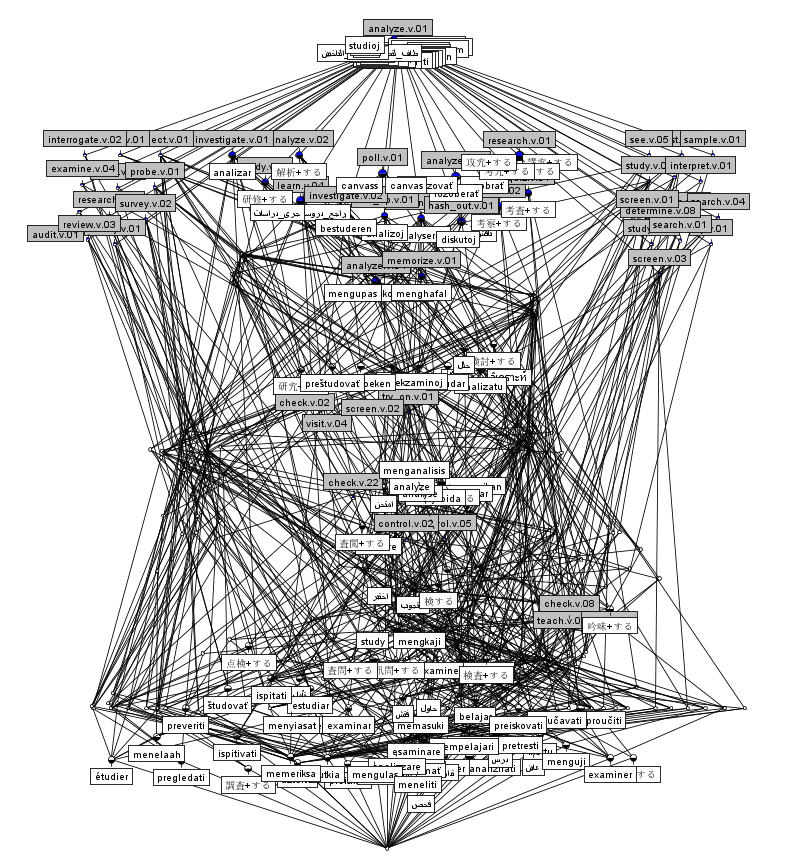

Теперь мы имеем возможность рассмотреть решетку формальных понятий. Перед тем, как описывать данные, полученные для нашей матрицы, давайте рассмотрим механику устройства решетки формальных понятий. Она предстает нам в виде графа, в верхней части которого находятся "простейшие" значения: значения, которые могут встретиться у леммы сами по себе. Более нижние узлы - "дети" верхних - наследуют их значения. То есть, для узла - "сына" узла со значением A и узла со значением B будет справедливо, что сам "сын" будет обладать значениями A и B. Итак, за счет такой иерархии решетка формальных понятий помогает нам "объединить" значения в порядке их усложнения и, возможно, увидеть какие-то закономерности в наборе значений, которыми обладают слова в разных языках, имеющие разные значения.

Обращаясь к нашему датасету, первое, что можно отметить - то, что в силу большого количества данных работать с визуализацией снова оказывается задачей непростой и неинтуитивной. Но, более подробно разобравшись в происходящем, мы сможем сделать для себя некоторые выводы, которые не были так очевидны для предыдущих визуализаций. В первую очередь, заметим, насколько важной частью графа на самом деле является синсет ``analyze.v.01``. Он не только объединяет вокруг себя огромное количество лемм, которые характеризуются только этим значением, но и оказывается "во главе" нашего графа.

Еще одно наблюдение связано с тем, что достаточно малое количество лемм нашего синсета обладают маленьким количеством значений. Если попытаться разделить все леммы на группы по количеству значений в "родительских" путях, то окажется, что 26 лемм имеют значение ``analyze.v.01``, 21 лемма имеет значение ``analyze.v.01`` и какое-то еще одно, 3 леммы имеют суммарно три значения, 11 лемм имеют суммарно 4 значения, примерно 48 лемм имеют 5 и больше значений. Отсюда можем сделать дополнительный вывод о том, что рассматриваемые нами леммы скорее склонны иметь очень много или очень мало значений - это тоже интересное статистическое наблюдение.

В целом можно заметить, что данный формат визуализации, безусловно, интересен возможностью посмотреть на данные с нового ракурса. Безусловно, техническая ограниченность программы и большой объем данных затрудняют возможность удобной интерпретации, но мы, тем не менее, смогли сделать ряд достаточно интересных выводов: в частности, о том, что analyze.v.01 - значение, которое объединяет абсолютно все наши леммы, и о том, что леммы данного датасета предпочитают иметь или очень мало, или очень много значений. Неясно, насколько эти данные и дальнейшие наблюдения, сделанные на этом графике, смогут помочь нам выстроить карту типологических переходов - но какие-то интересные наблюдения сделаны быть могут.